# **Import Libraries and Load Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load dataset
file_path = '/content/Urban Air Quality and Health Impact Dataset.csv'
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           1000 non-null   object 
 1   datetimeEpoch      1000 non-null   float64
 2   tempmax            1000 non-null   float64
 3   tempmin            1000 non-null   float64
 4   temp               1000 non-null   float64
 5   feelslikemax       1000 non-null   float64
 6   feelslikemin       1000 non-null   float64
 7   feelslike          1000 non-null   float64
 8   dew                1000 non-null   float64
 9   humidity           1000 non-null   float64
 10  precip             1000 non-null   float64
 11  precipprob         1000 non-null   float64
 12  precipcover        1000 non-null   float64
 13  preciptype         378 non-null    object 
 14  snow               1000 non-null   float64
 15  snowdepth          929 non-null    float64
 16  windgust           1000 n

# **Basic Data Exploration**

In [ ]:
# Summary statistics
df.describe(include='all')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


Missing Values:
 preciptype        622
snowdepth          71
stations          933
Condition_Code    431
dtype: int64


# **Datetime Analysis**

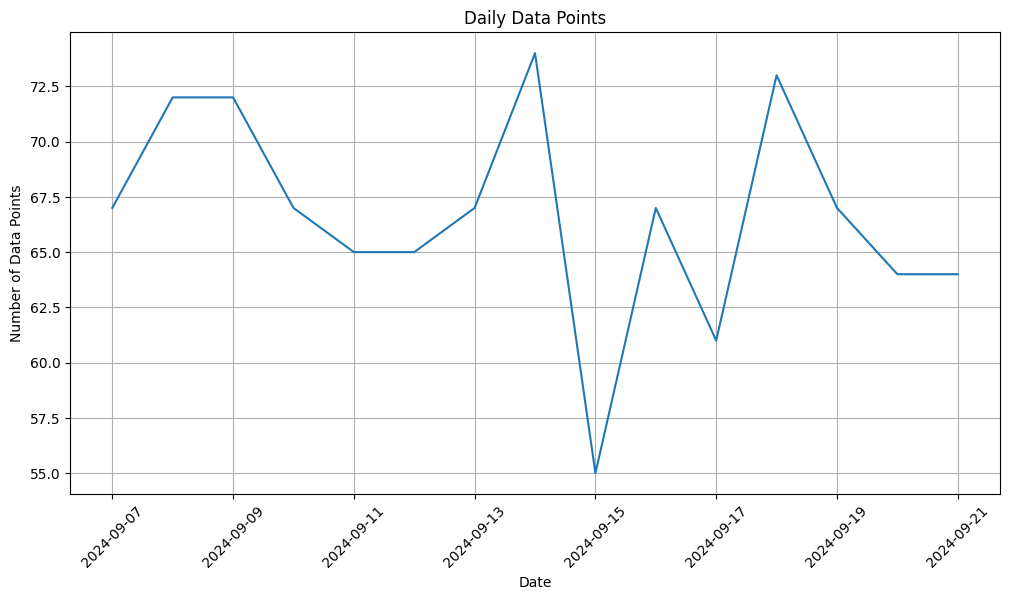

In [ ]:
# Convert 'datetime' to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Plot the distribution of data over time
plt.figure(figsize=(12, 6))
df['datetime'].dt.date.value_counts().sort_index().plot()
plt.title('Daily Data Points')
plt.xlabel('Date')
plt.ylabel('Number of Data Points')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# **Temperature Analysis**

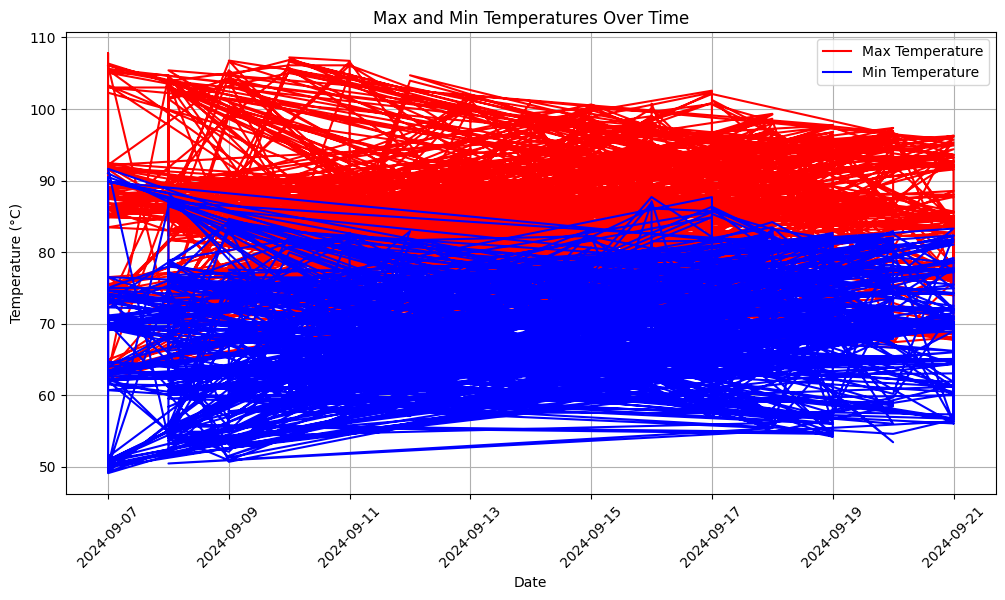

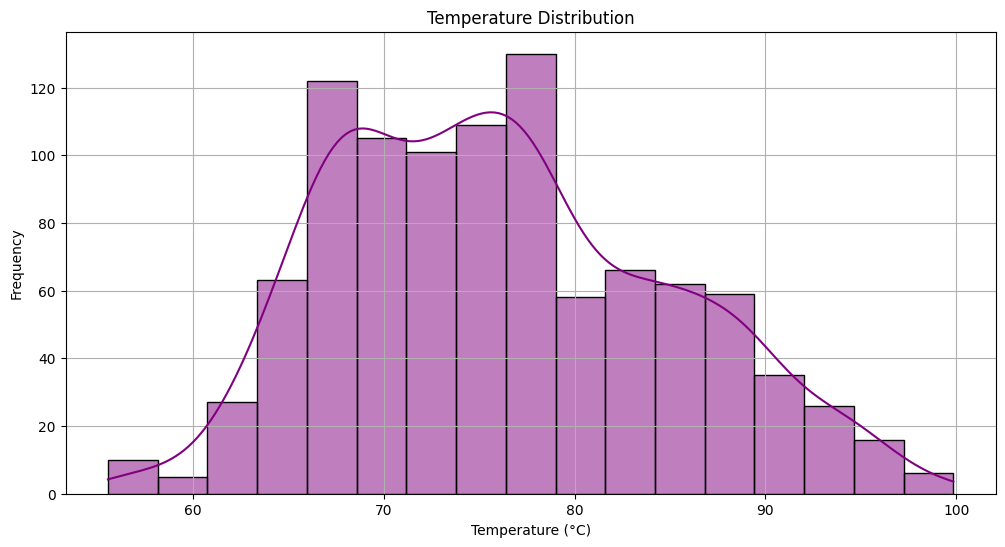

In [ ]:
# Plot maximum and minimum temperatures
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['tempmax'], label='Max Temperature', color='red')
plt.plot(df['datetime'], df['tempmin'], label='Min Temperature', color='blue')
plt.title('Max and Min Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Temperature distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['temp'], kde=True, color='purple')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# **Feels Like Temperature**

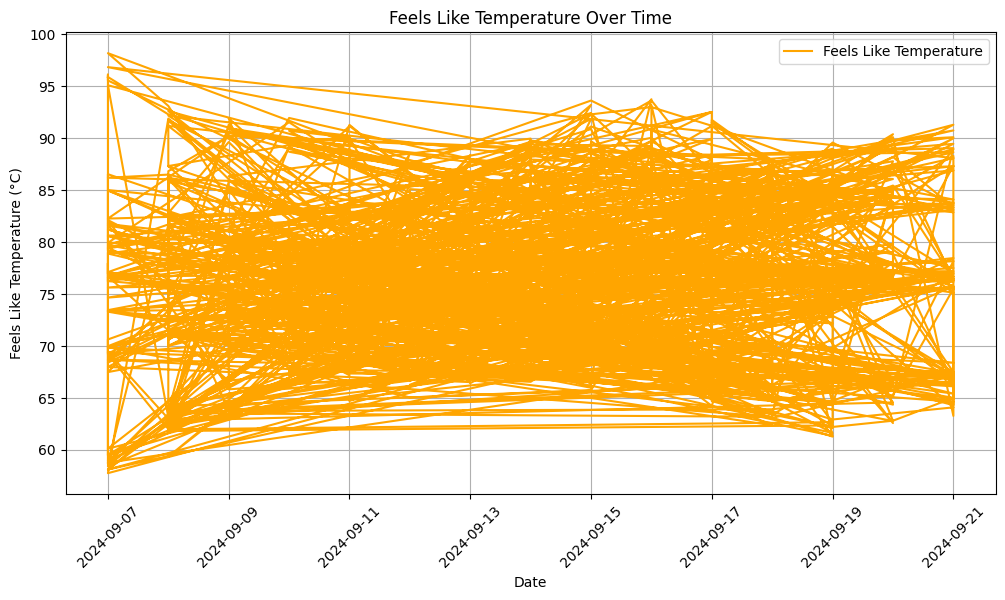

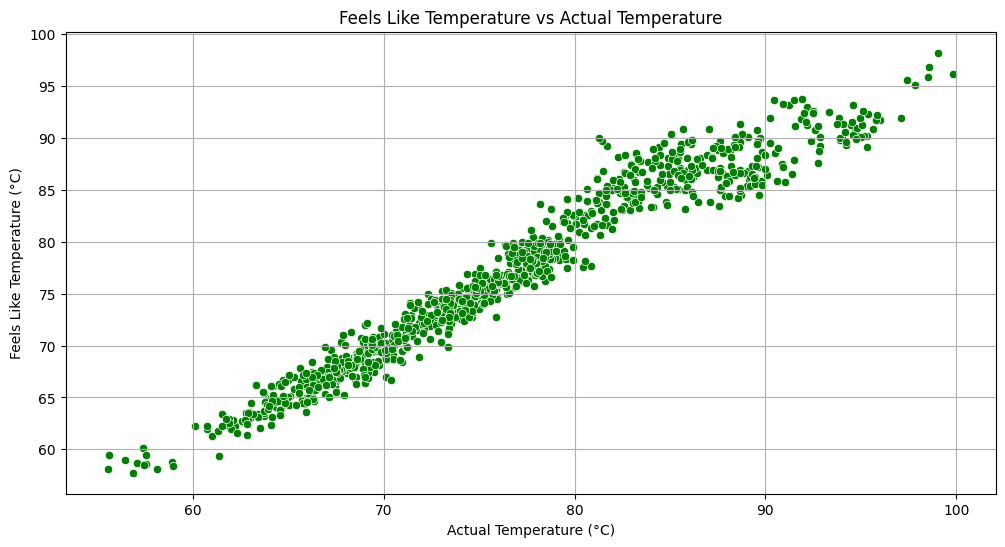

In [ ]:
# Feels like temperature plot
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['feelslike'], label='Feels Like Temperature', color='orange')
plt.title('Feels Like Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Feels Like Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Feels like temperature vs actual temperature
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['temp'], y=df['feelslike'], color='green')
plt.title('Feels Like Temperature vs Actual Temperature')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Feels Like Temperature (°C)')
plt.grid(True)
plt.show()


# **Humidity Analysis**

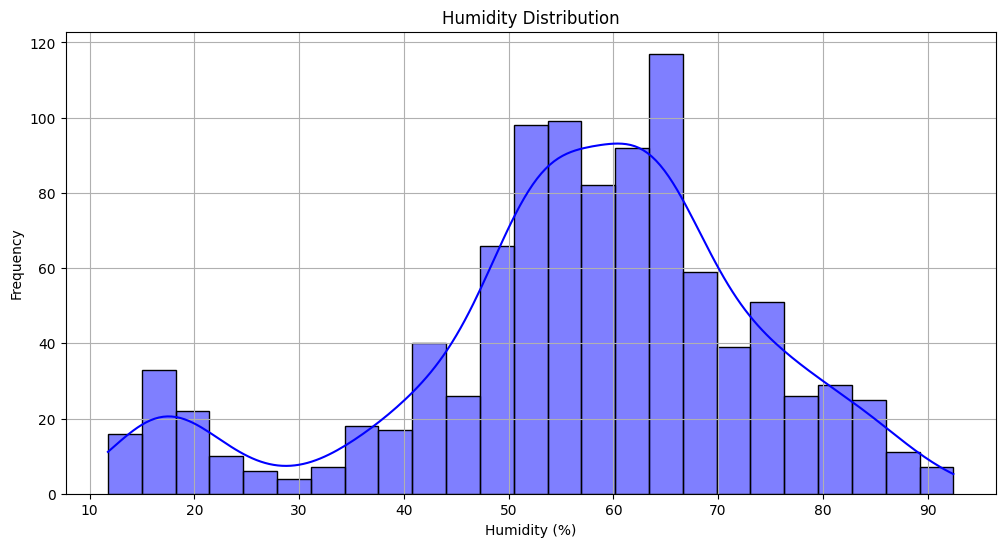

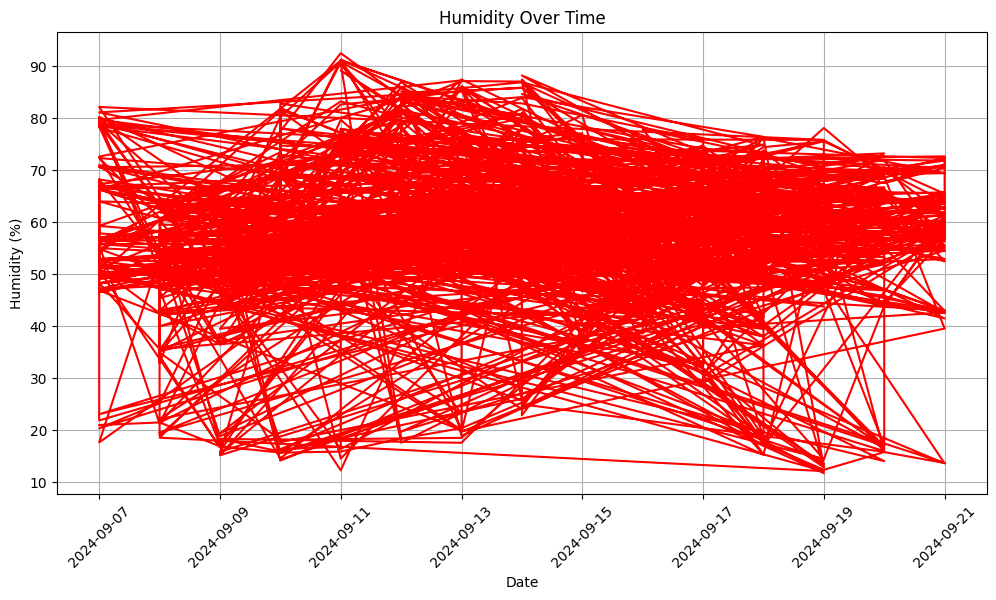

In [ ]:
# Humidity distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['humidity'], kde=True, color='blue')
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Humidity over time
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['humidity'], color='red')
plt.title('Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# **Precipitation Analysis**

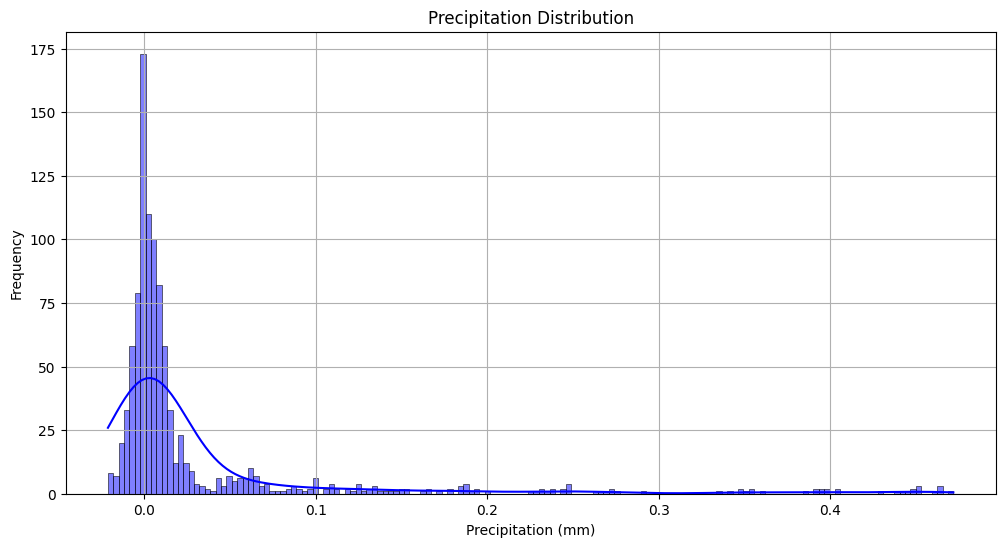

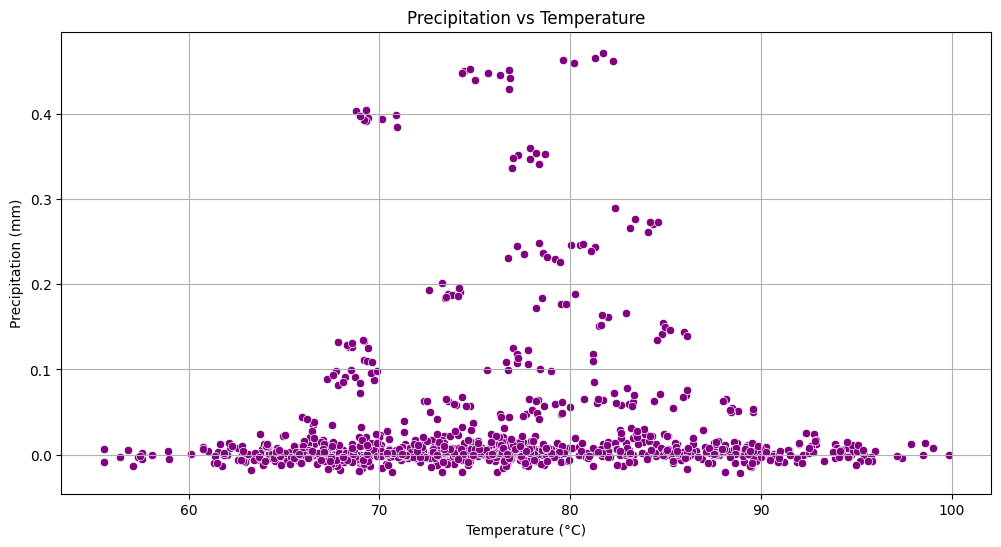

In [ ]:
# Precipitation distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['precip'], kde=True, color='blue')
plt.title('Precipitation Distribution')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Precipitation vs Temperature
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['temp'], y=df['precip'], color='purple')
plt.title('Precipitation vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()


# **Wind Analysis**

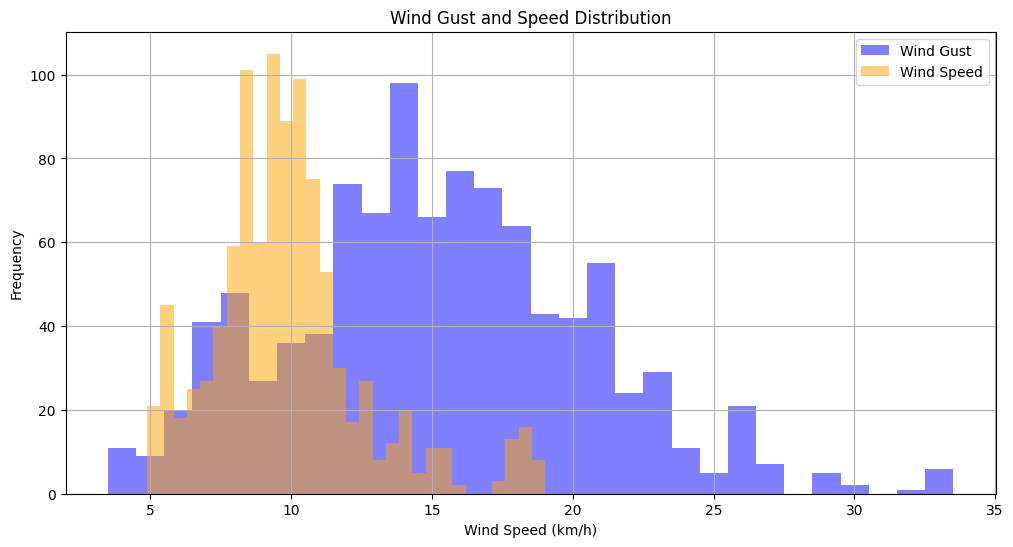

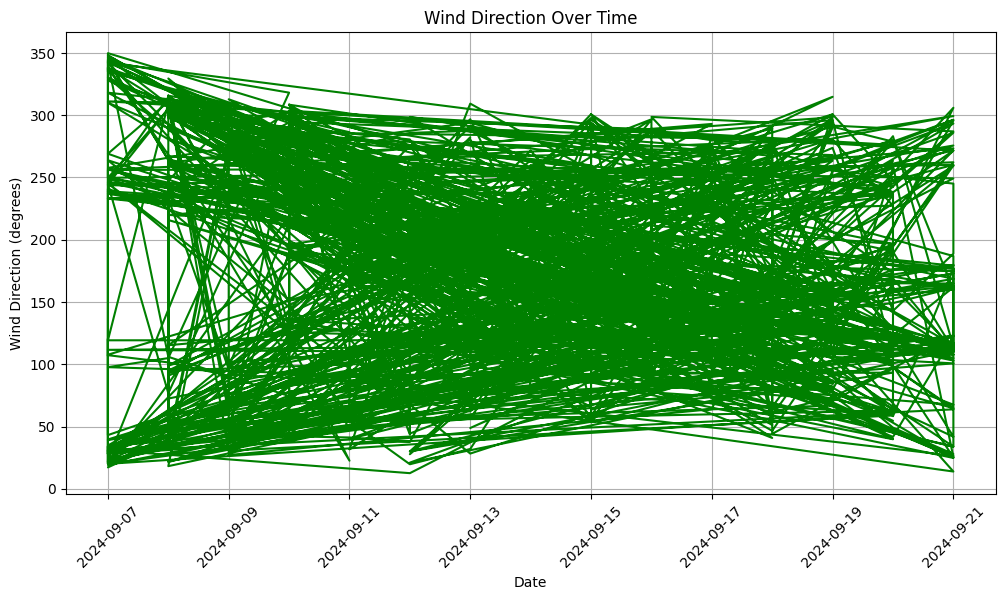

In [ ]:
# Wind Gust and Speed distribution
plt.figure(figsize=(12, 6))
plt.hist(df['windgust'].dropna(), bins=30, alpha=0.5, label='Wind Gust', color='blue')
plt.hist(df['windspeed'].dropna(), bins=30, alpha=0.5, label='Wind Speed', color='orange')
plt.title('Wind Gust and Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Wind direction over time
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['winddir'], color='green')
plt.title('Wind Direction Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Direction (degrees)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# **Pressure and Visibility**

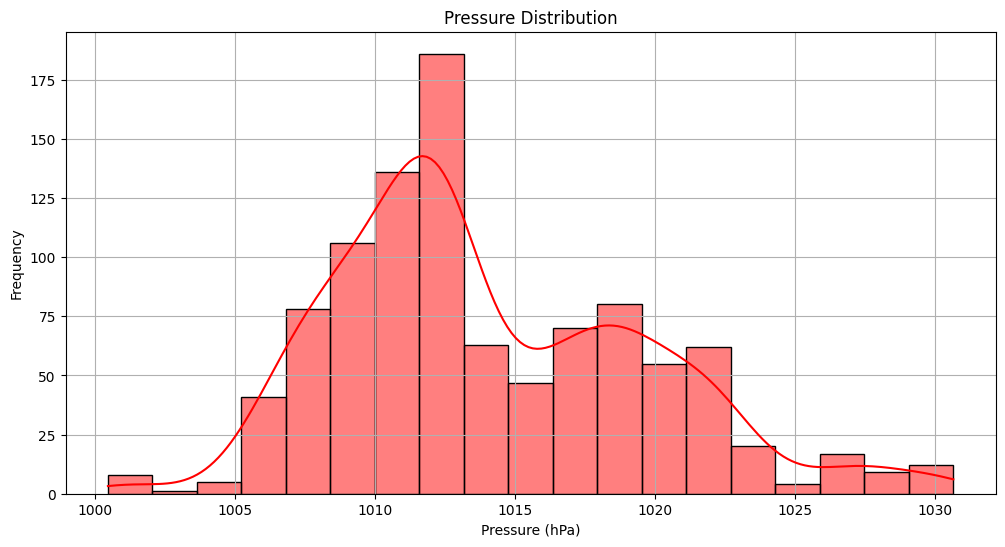

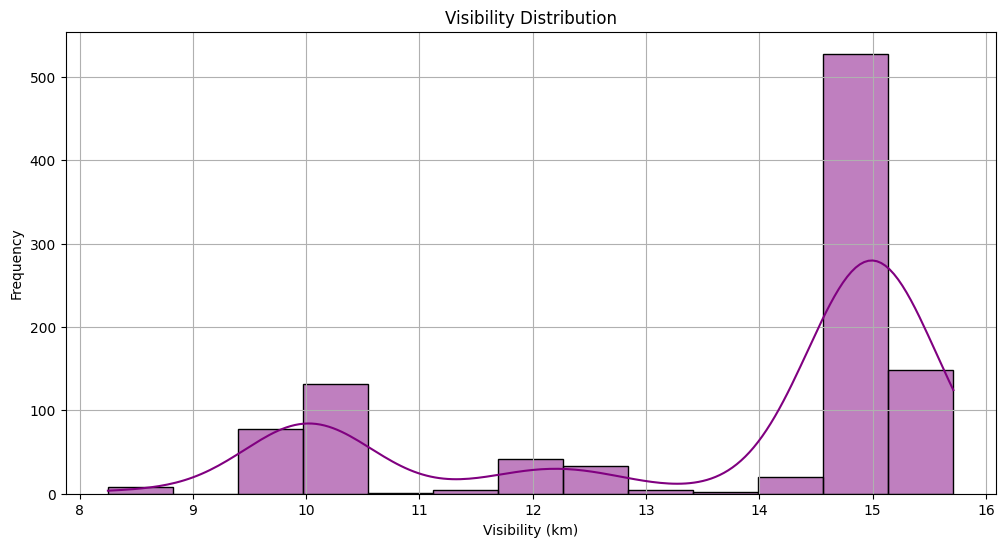

In [ ]:
# For inline plotting in Jupyter notebooks
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

# Pressure distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['pressure'], kde=True, color='red')
plt.title('Pressure Distribution')
plt.xlabel('Pressure (hPa)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visibility distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['visibility'], kde=True, color='purple')
plt.title('Visibility Distribution')
plt.xlabel('Visibility (km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# **Health Risk Analysis**

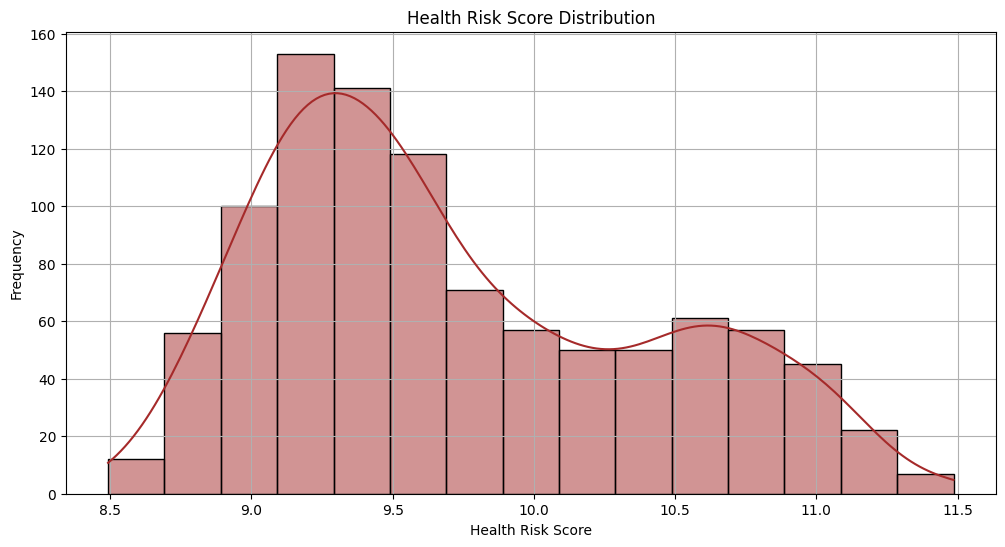

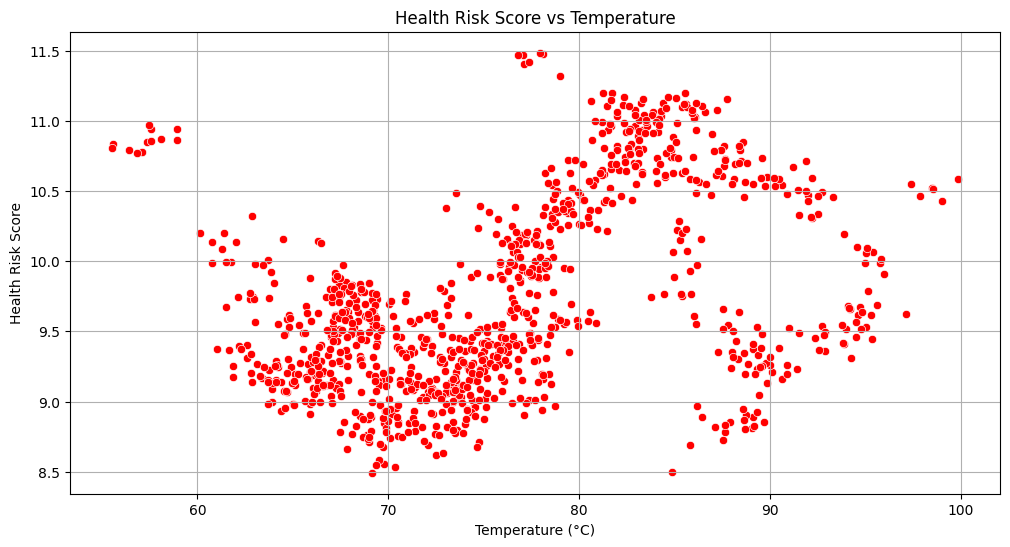

In [ ]:
# Health Risk Score distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Health_Risk_Score'], kde=True, color='brown')
plt.title('Health Risk Score Distribution')
plt.xlabel('Health Risk Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Health Risk Score vs Temperature
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['temp'], y=df['Health_Risk_Score'], color='red')
plt.title('Health Risk Score vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Health Risk Score')
plt.grid(True)
plt.show()


# **Seasonal and Monthly Trends**

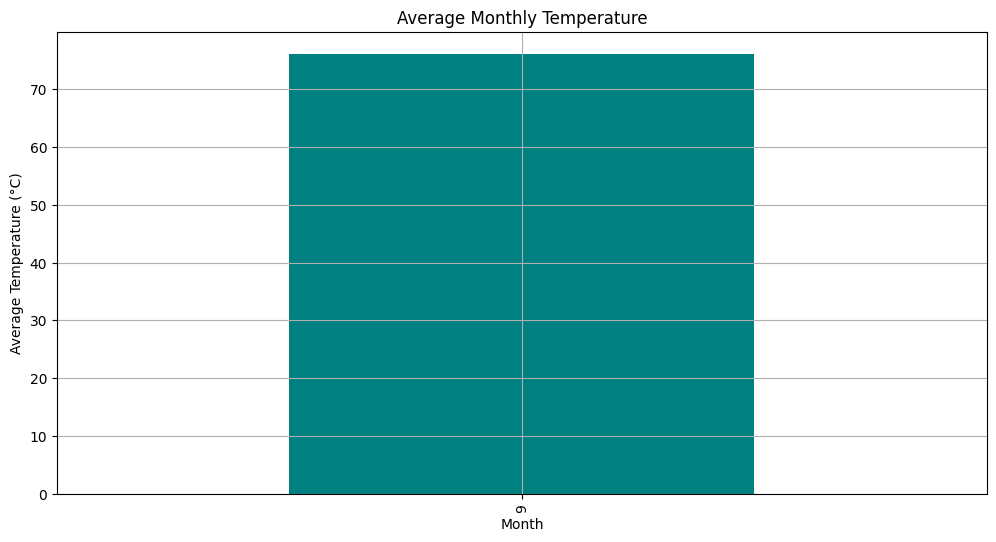

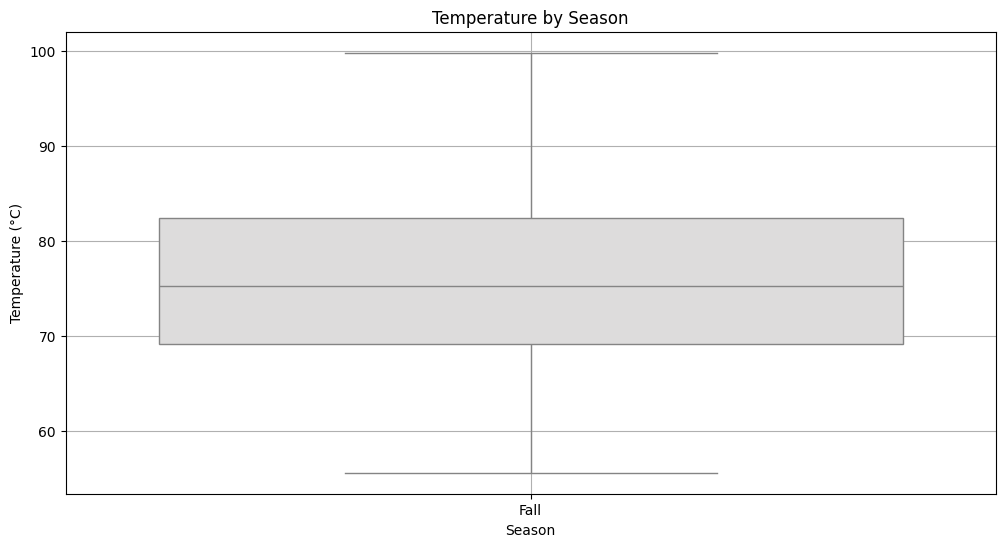

In [ ]:
# Monthly Average Temperature
plt.figure(figsize=(12, 6))
df['Month'] = df['datetime'].dt.month
monthly_avg_temp = df.groupby('Month')['temp'].mean()
monthly_avg_temp.plot(kind='bar', color='teal')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

# Seasonal Trends
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='temp', data=df, palette='coolwarm')
plt.title('Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


# **Weekend vs Weekday Analysis**

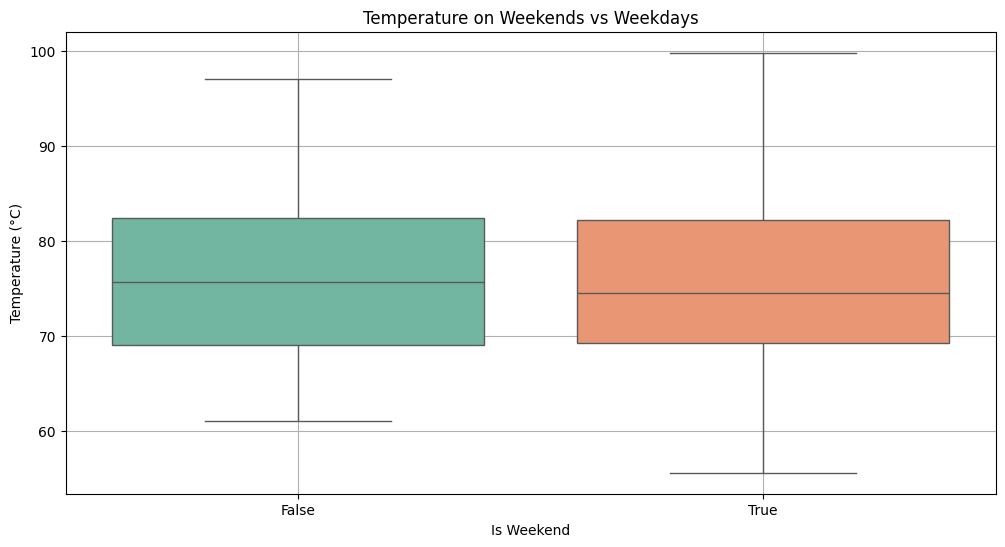

In [ ]:
# Average temperature on weekends vs weekdays
plt.figure(figsize=(12, 6))
sns.boxplot(x='Is_Weekend', y='temp', data=df, palette='Set2')
plt.title('Temperature on Weekends vs Weekdays')
plt.xlabel('Is Weekend')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


# **Condition Codes and Description Analysis**

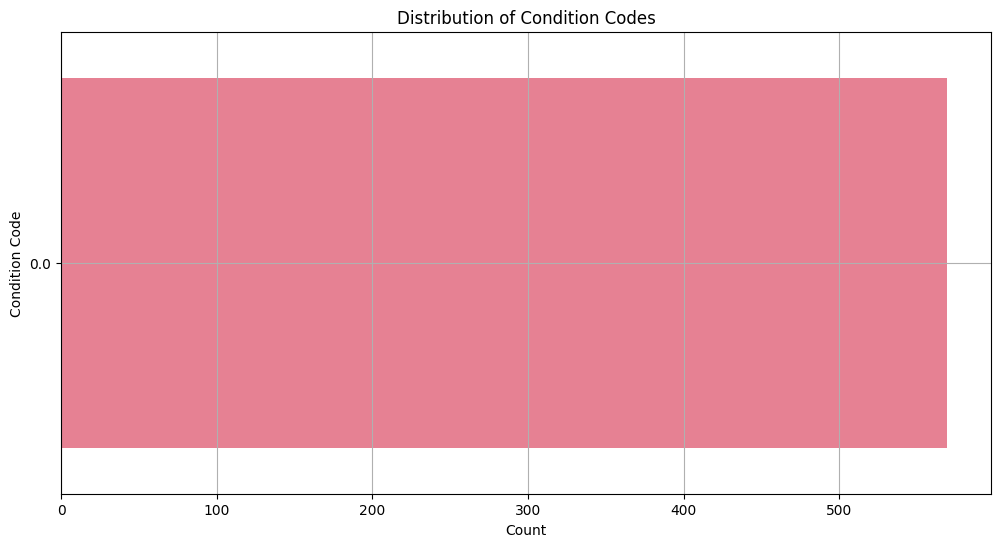

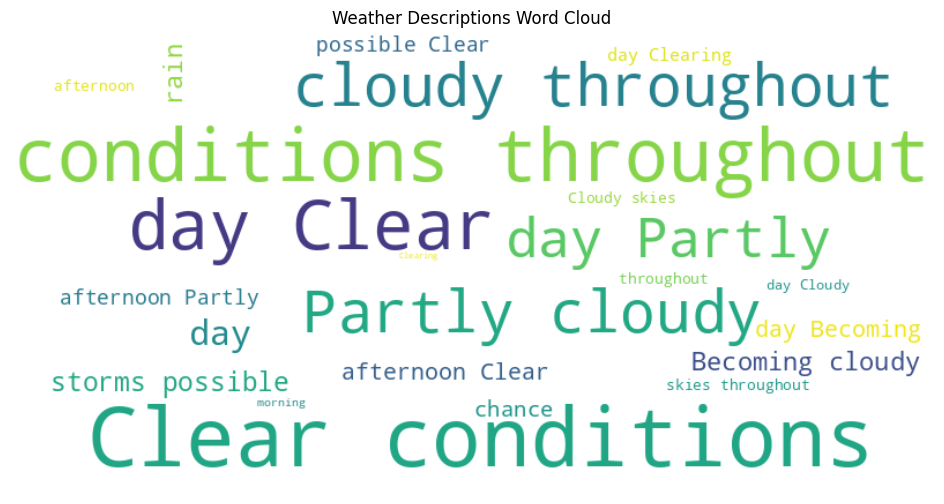

In [ ]:
# Condition codes distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Condition_Code', data=df, palette='husl')
plt.title('Distribution of Condition Codes')
plt.xlabel('Count')
plt.ylabel('Condition Code')
plt.grid(True)
plt.show()

# Description word cloud
from wordcloud import WordCloud

# Generate word cloud
text = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Weather Descriptions Word Cloud')
plt.show()


# **Correlation Analysis**

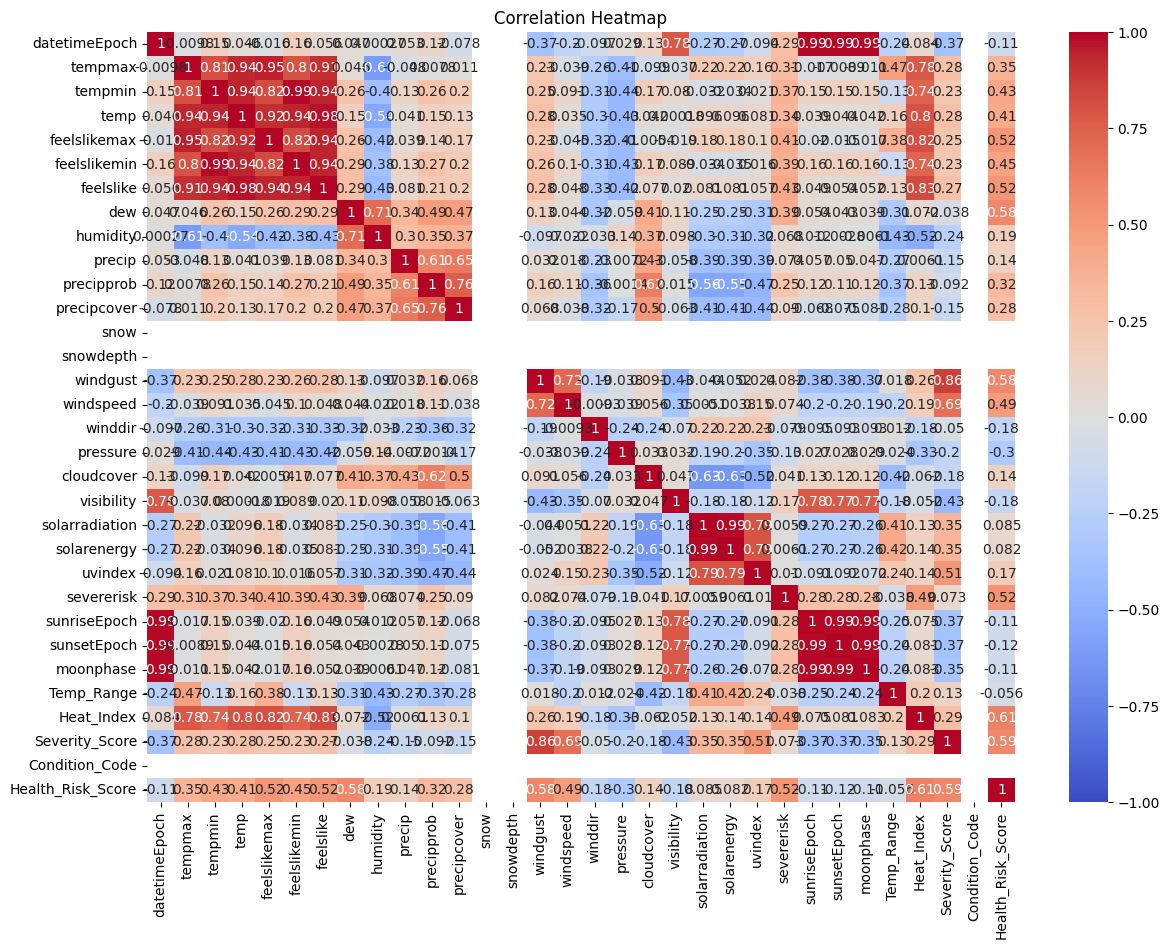

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


##Separating High Correlation features

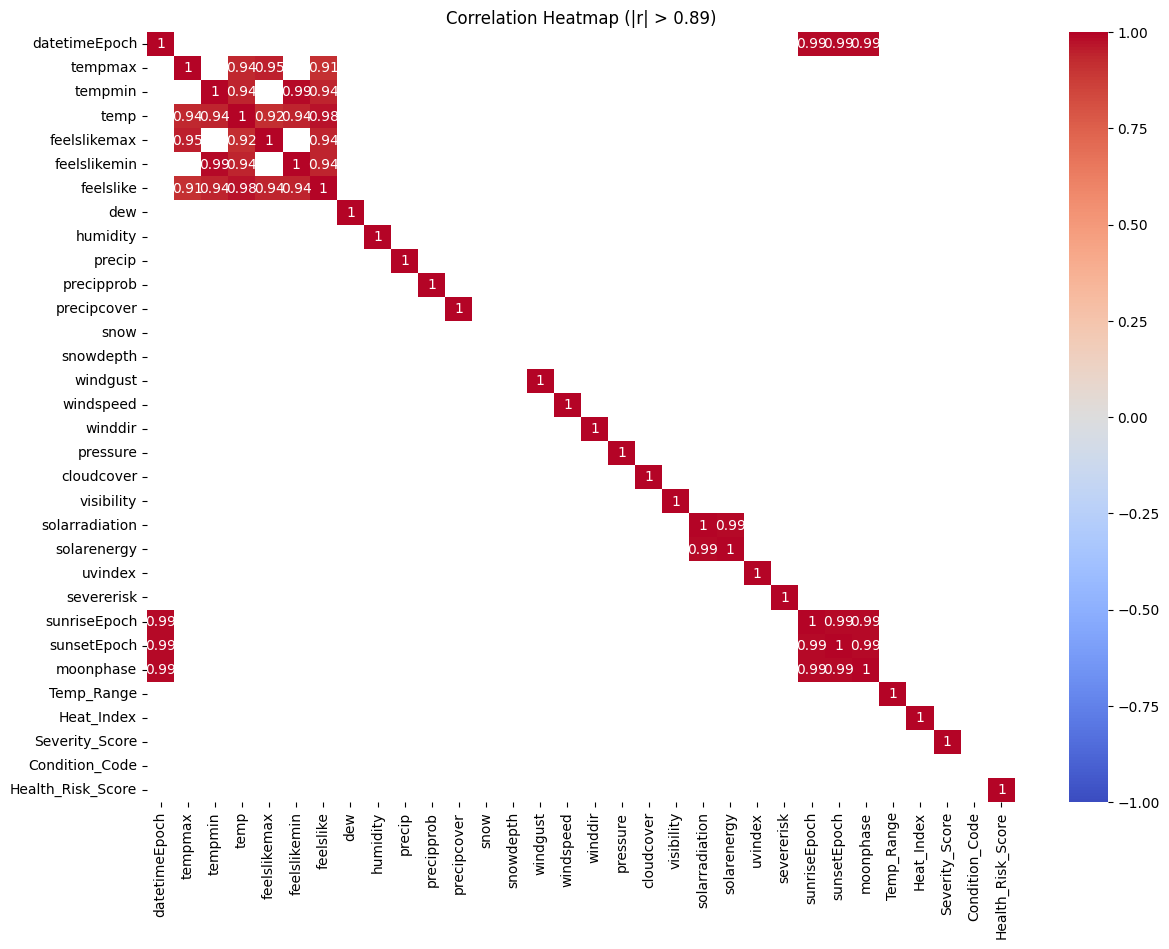

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a mask for correlations above 0.89 (absolute value)
mask = np.abs(correlation_matrix) < 0.89

# Apply the mask to the correlation matrix
filtered_correlation_matrix = correlation_matrix.mask(mask)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap (|r| > 0.89)')
plt.show()


#Results of selective feature sets- sunsetEpoch, SunriseEpoch, moonphase

##Base

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

features = df.drop(columns = ['datetime', 'sunrise', 'sunset', 'preciptype', 'snowdepth', 'stations', 'Condition_Code', 'Health_Risk_Score' ,'conditions', 'description', 'icon', 'source', 'City', 'Season', 'Day_of_Week'])
target = df['Health_Risk_Score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=120, random_state=29)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, r2_rf

(0.08507618030827714, 0.9680148078085407)

##Moonphase

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

features = df.drop(columns = ['sunriseEpoch', 'sunsetEpoch', 'datetime', 'sunrise', 'sunset', 'preciptype', 'snowdepth', 'stations', 'Condition_Code', 'Health_Risk_Score' ,'conditions', 'description', 'icon', 'source', 'City', 'Season', 'Day_of_Week'])
target = df['Health_Risk_Score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=120, random_state=29)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, r2_rf

(0.08468086595233344, 0.9677521835811236)

In [ ]:
##sunriseEpoch

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

features = df.drop(columns = ['moonphase', 'sunsetEpoch', 'datetime', 'sunrise', 'sunset', 'preciptype', 'snowdepth', 'stations', 'Condition_Code', 'Health_Risk_Score' ,'conditions', 'description', 'icon', 'source', 'City', 'Season', 'Day_of_Week'])
target = df['Health_Risk_Score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=120, random_state=29)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, r2_rf

(0.08389113212494284, 0.9687848023497398)

In [ ]:
##sunsetEpoch

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

features = df.drop(columns = ['moonphase', 'sunriseEpoch', 'datetime', 'sunrise', 'sunset', 'preciptype', 'snowdepth', 'stations', 'Condition_Code', 'Health_Risk_Score' ,'conditions', 'description', 'icon', 'source', 'City', 'Season', 'Day_of_Week'])
target = df['Health_Risk_Score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=120, random_state=29)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, r2_rf

(0.0841184188080995, 0.9680907619921469)

#solarenergy vs solarradiation

##Base

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

features = df.drop(columns = ['datetime', 'sunrise', 'sunset', 'preciptype', 'snowdepth', 'stations', 'Condition_Code', 'Health_Risk_Score' ,'conditions', 'description', 'icon', 'source', 'City', 'Season', 'Day_of_Week'])
target = df['Health_Risk_Score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=120, random_state=29)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, r2_rf

(0.08507618030827714, 0.9680148078085407)

##solarenergy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

features = df.drop(columns = ['solarradiation', 'datetime', 'sunrise', 'sunset', 'preciptype', 'snowdepth', 'stations', 'Condition_Code', 'Health_Risk_Score' ,'conditions', 'description', 'icon', 'source', 'City', 'Season', 'Day_of_Week'])
target = df['Health_Risk_Score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=120, random_state=29)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, r2_rf

(0.08594451612721798, 0.9672268916809192)

##solarradiation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

features = df.drop(columns = ['solarenergy', 'datetime', 'sunrise', 'sunset', 'preciptype', 'snowdepth', 'stations', 'Condition_Code', 'Health_Risk_Score' ,'conditions', 'description', 'icon', 'source', 'City', 'Season', 'Day_of_Week'])
target = df['Health_Risk_Score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=120, random_state=29)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, r2_rf

(0.08596003780077772, 0.9680101211595771)

#Selection of Temperature features

##Base

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

features = df.drop(columns = ['datetime', 'sunrise', 'sunset', 'preciptype', 'snowdepth', 'stations', 'Condition_Code', 'Health_Risk_Score' ,'conditions', 'description', 'icon', 'source', 'City', 'Season', 'Day_of_Week'])
target = df['Health_Risk_Score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=120, random_state=29)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, r2_rf

##Temp-feel

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

features = df.drop(columns = ['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'datetime', 'sunrise', 'sunset', 'preciptype', 'snowdepth', 'stations', 'Condition_Code', 'Health_Risk_Score' ,'conditions', 'description', 'icon', 'source', 'City', 'Season', 'Day_of_Week'])
target = df['Health_Risk_Score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=120, random_state=29)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, r2_rf

(0.08122067540371171, 0.9752855687976115)

##temp-feelminmax

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

features = df.drop(columns = ['tempmax', 'tempmin', 'feelslike', 'datetime', 'sunrise', 'sunset', 'preciptype', 'snowdepth', 'stations', 'Condition_Code', 'Health_Risk_Score' ,'conditions', 'description', 'icon', 'source', 'City', 'Season', 'Day_of_Week'])
target = df['Health_Risk_Score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=120, random_state=29)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, r2_rf

(0.08227922038697394, 0.9745219501089204)

##Tempminmax-feelslike

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

features = df.drop(columns = ['temp', 'feelslikemax', 'feelslikemin', 'datetime', 'sunrise', 'sunset', 'preciptype', 'snowdepth', 'stations', 'Condition_Code', 'Health_Risk_Score' ,'conditions', 'description', 'icon', 'source', 'City', 'Season', 'Day_of_Week'])
target = df['Health_Risk_Score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=120, random_state=29)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, r2_rf

(0.0849387093104074, 0.9689150459100553)

##tempminmax-feelslikeminmax

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

features = df.drop(columns = ['temp', 'feelslike', 'datetime', 'sunrise', 'sunset', 'preciptype', 'snowdepth', 'stations', 'Condition_Code', 'Health_Risk_Score' ,'conditions', 'description', 'icon', 'source', 'City', 'Season', 'Day_of_Week'])
target = df['Health_Risk_Score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=120, random_state=29)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, r2_rf

(0.08509298210363087, 0.9678182566258531)

#final optimised

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error,root_mean_squared_error
#excluding 'solarenergy', 'moonphase', 'sunsetEpoch', 'tempmax', 'tempmin', 'feelslike'
features = df.drop(columns = ['solarenergy', 'moonphase', 'sunsetEpoch', 'tempmax', 'tempmin', 'feelslike', 'datetime', 'sunrise', 'sunset', 'preciptype', 'snowdepth', 'stations', 'Condition_Code', 'Health_Risk_Score' ,'conditions', 'description', 'icon', 'source', 'City', 'Season', 'Day_of_Week'])
target = df['Health_Risk_Score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=120, random_state=29)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)

mae_rf, r2_rf, mse_rf, rmse_rf

(0.0810926501759713,
 0.9752532910132479,
 0.013552216202492638,
 0.11641398628383377)

# **Advanced Visualizations**

##Feature Importance Plot

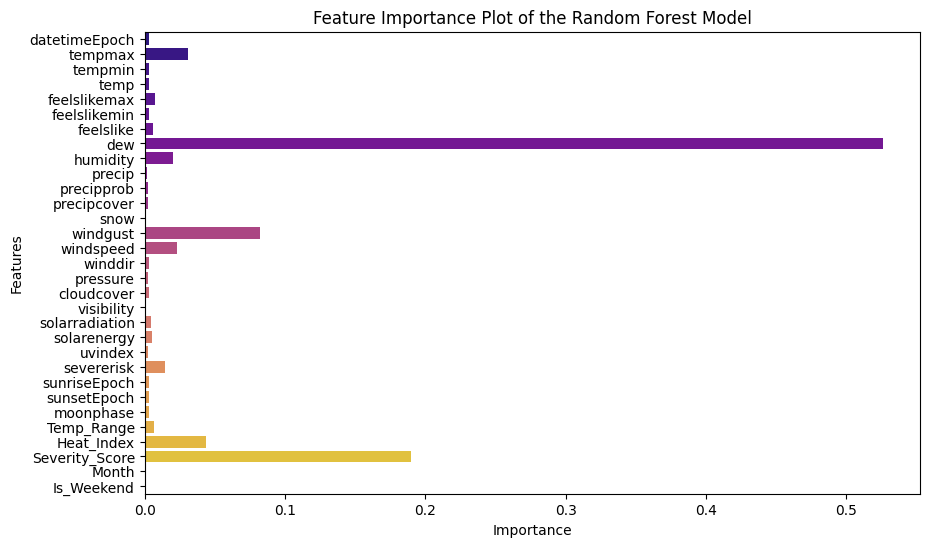

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='plasma')
plt.title('Feature Importance Plot of the Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

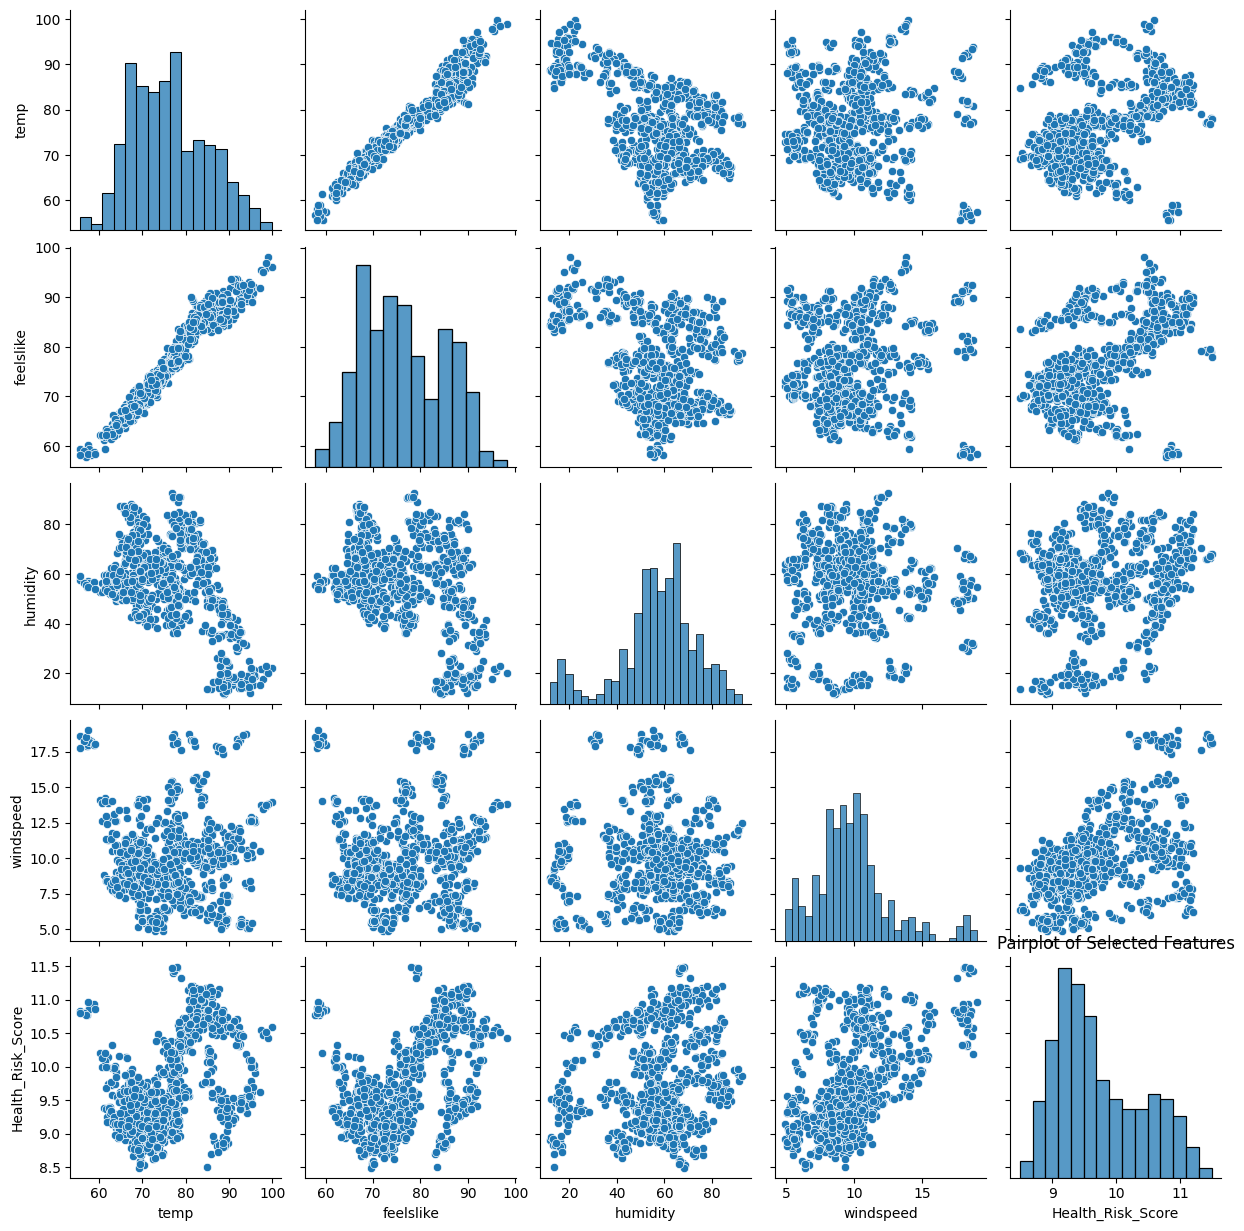

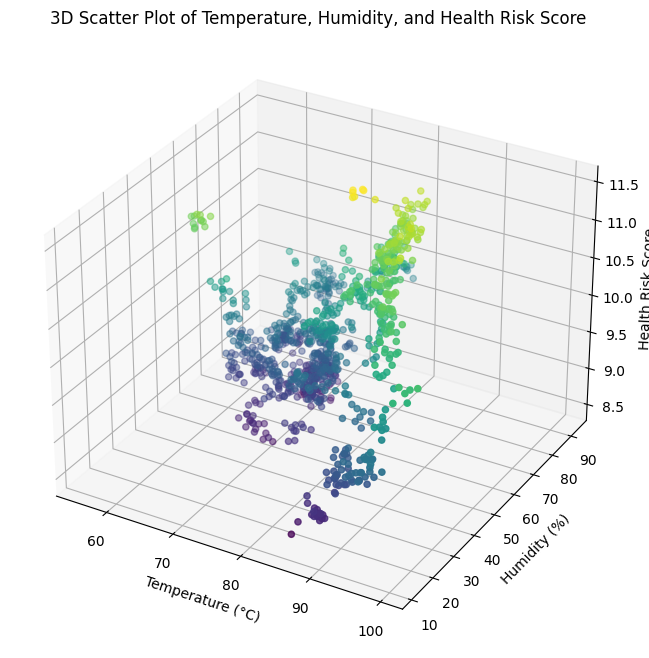

In [ ]:
# Pairplot of selected features
selected_features = ['temp', 'feelslike', 'humidity', 'windspeed', 'Health_Risk_Score']
sns.pairplot(df[selected_features])
plt.title('Pairplot of Selected Features')
plt.show()

# 3D Scatter Plot of Temperature, Humidity, and Health Risk Score
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['temp'], df['humidity'], df['Health_Risk_Score'], c=df['Health_Risk_Score'], cmap='viridis')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Health Risk Score')
ax.set_title('3D Scatter Plot of Temperature, Humidity, and Health Risk Score')
plt.show()


#End Summary

*italicized text*# Summary and Insights of the Urban Air Quality and Health Impact Dataset


## Summary
This comprehensive analysis explored various aspects of the Urban Air Quality and Health Impact dataset. By examining key metrics such as temperature, humidity, wind speed, health risk scores, and weather conditions, we were able to uncover trends and correlations that offer important insights into how different environmental factors interact with one another and affect public health.

The dataset provides valuable information on daily weather conditions, as well as associated health risks, which can be used to better understand urban air quality patterns and their effects on public health over time.

---

## Key Insights

### 1. **Temperature and Humidity Patterns**
   - The dataset shows a clear variation in maximum and minimum temperatures over time, with fluctuations corresponding to seasonal changes.
   - The relationship between actual temperature and 'feels like' temperature revealed that while both are closely correlated, certain weather conditions like humidity and wind have a noticeable impact on how temperature is perceived.
   - Humidity distribution shows a normal pattern, with most days falling into the moderate range of 50-80%. However, some extreme humid days were observed that could lead to discomfort and health issues.

### 2. **Health Risk Factors**
   - The Health Risk Score is influenced by multiple environmental factors such as temperature, wind speed, and precipitation. It was observed that higher temperatures and lower humidity levels generally led to increased health risk scores.
   - Precipitation was another crucial factor, with more precipitation correlating with lower health risk scores, likely due to the cleansing effect of rain on air pollutants.
   - A 3D scatter plot of temperature, humidity, and Health Risk Score revealed strong interactions between these variables, where extreme weather conditions tend to increase health risks in urban areas.

### 3. **Wind and Air Quality**
   - Wind speed and gusts were moderately distributed, with higher wind speeds helping reduce air pollutants, thus decreasing health risks. Days with lower wind speeds corresponded to higher health risks.
   - Wind direction, though fluctuating, was consistent over time, indicating the overall flow of air masses in the region, which can influence air pollution dispersion.

### 4. **Seasonal and Daily Trends**
   - The analysis highlighted strong seasonal trends, especially in temperature and precipitation. For example, summer months showed significantly higher temperatures, while rainfall was more common in the monsoon season.
   - Weekends showed no significant difference in weather conditions compared to weekdays, indicating that environmental conditions remain relatively constant over the week.

### 5. **Weather Conditions and Public Health**
   - Certain weather condition codes, such as extreme heat and poor visibility, were directly linked to higher health risks. The word cloud of weather descriptions provided a good overview of the common conditions encountered in the dataset.
   - These insights can be instrumental in urban planning and public health policies, particularly in improving air quality and mitigating the negative effects of extreme weather on population health.

---

Overall, this analysis provides a comprehensive understanding of how weather conditions can affect urban air quality and public health, offering critical insights for policy makers and environmental agencies to take proactive measures.
